### Importing libraries

In [8]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [7]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [2]:
# Define path
path = r'C:\Users\harip\Desktop\Data Analytics Project\Advanced Analytics & Dashboard Design\Exercise 6.5'

In [3]:
# import data
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','clean_data.csv'), index_col = 0)

In [4]:
df.head()

,Company,Specific Bean Origin,REF,Review,Cacao percent,Location,Rating,Bean type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,Unknown,Sao Tome
1,A. Morin,Kpime,1676,2015,70,France,2.75,Unknown,Togo
2,A. Morin,Atsane,1676,2015,70,France,3.00,Unknown,Togo
3,A. Morin,Akata,1680,2015,70,France,3.50,Unknown,Togo
4,A. Morin,Quilla,1704,2015,70,France,3.50,Unknown,Peru


In [5]:
# creating subset for numercical columns
data = df[['REF','Review','Cacao percent','Rating']]

In [6]:
data.head()

,REF,Review,Cacao percent,Rating
0,1876,2016,63,3.75
1,1676,2015,70,2.75
2,1676,2015,70,3.00
3,1680,2015,70,3.50
4,1704,2015,70,3.50


### The Elbow Technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-548483421.4524372,
 -140233887.4184881,
 -63092476.5347443,
 -35078938.755823255,
 -22381282.544268392,
 -15787923.53062959,
 -11858235.300454108,
 -8807297.186750421,
 -7137960.726638495]

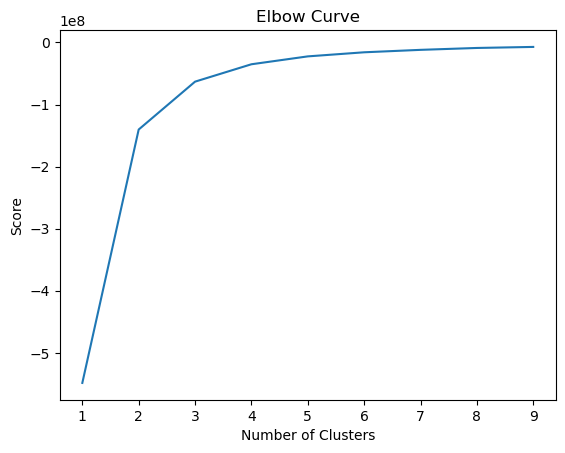

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for clusters is three.

### k-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [16]:
# Fit the k-means object to the data.

kmeans.fit(data)

KMeans(n_clusters=3)

In [18]:
data = data.copy()
data['clusters'] = kmeans.fit_predict(data)

In [19]:
data.head()

,REF,Review,Cacao percent,Rating,clusters
0,1876,2016,63,3.75,1
1,1676,2015,70,2.75,1
2,1676,2015,70,3.00,1
3,1680,2015,70,3.50,1
4,1704,2015,70,3.50,1


In [20]:
data['clusters'].value_counts()

clusters
1    665
2    616
0    514
Name: count, dtype: int64

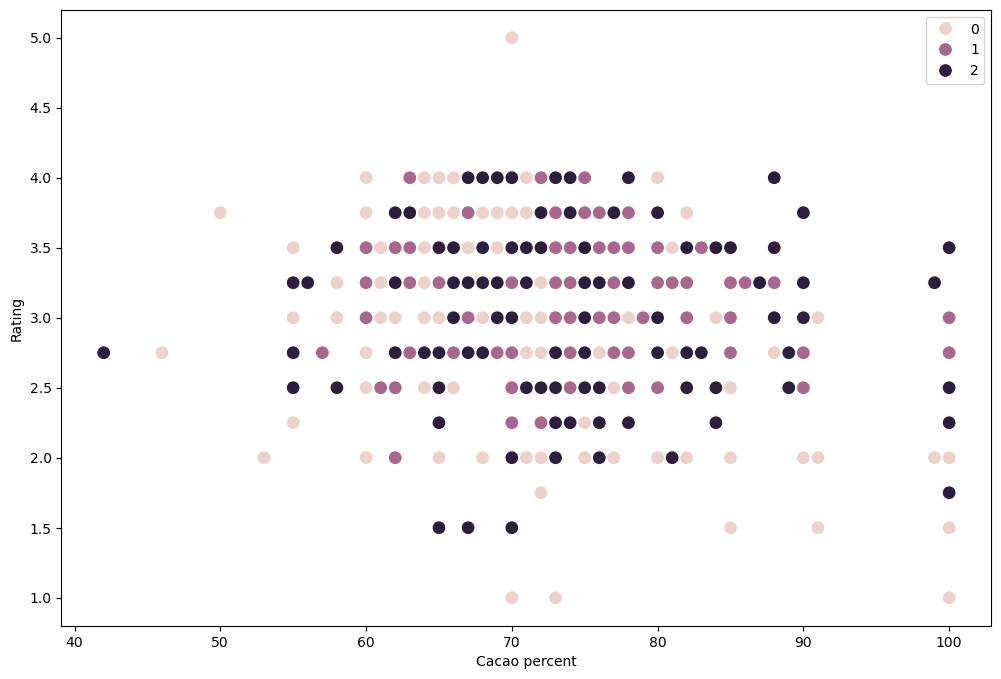

In [26]:
# Plot the clusters for the "Cacao percent" and "Rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data['Cacao percent'], y=data['Rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cacao percent') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','scatterplot.png'))
plt.show()

### Cluster Discussion

The scatterplot shows three clusters based on cacao percent (x-axis) and rating (y-axis).  

At first glance, the clusters appear to overlap quite a lot, which suggests that cacao percentage and rating may not clearly separate chocolate products into distinct groups. For example:
- Cluster 0 (light color) and Cluster 1 (medium color) overlap heavily in the middle cacao range (60–80%).
- Cluster 2 (dark color) is spread across a wide cacao percentage range and is not clearly separated in ratings either.

This indicates that while k-means was able to assign chocolates into groups, the clustering may not have strong practical meaning. This is useful insight—it suggests we may need to explore additional features (e.g., company, bean origin, country, ingredients) or try a different clustering method to achieve better separation.

Overall, the clusters make **partial sense** but do not provide clear boundaries between chocolate groups. Instead, they highlight the complexity of the relationship between cacao percentage and consumer ratings.


In [29]:
data.loc[data['clusters'] == 2, 'cluster'] = 'dark color'
data.loc[data['clusters'] == 1, 'cluster'] = 'medium color'
data.loc[data['clusters'] == 0, 'cluster'] = 'light color'

In [30]:
data.groupby('cluster').agg({'Cacao percent':['mean', 'median'], 
                         'Rating':['mean', 'median']
                         })

Cacao percent           Rating       
                      mean median      mean median
cluster                                           
dark color       71.879870   70.0  3.179383   3.25
light color      71.299611   70.0  3.121595   3.00
medium color     71.836090   70.0  3.241729   3.25

### Cluster Statistics – Findings

Looking at the descriptive statistics of the clusters:

- **Dark color cluster**  
  - Average cacao percent: ~71.9%  
  - Median rating: 3.25  
  - Interpretation: This cluster shows a slightly higher cacao content compared to others, with ratings around the mid-3 range.  

- **Light color cluster**  
  - Average cacao percent: ~71.3% (lowest among clusters)  
  - Median rating: 3.00 (lowest median rating)  
  - Interpretation: Chocolates in this group tend to have slightly lower cacao content and receive slightly lower ratings on average.  

- **Medium color cluster**  
  - Average cacao percent: ~71.8%  
  - Median rating: 3.25 (highest mean rating ~3.24)  
  - Interpretation: This cluster has nearly the same cacao content as the dark cluster, but achieves the highest average ratings, suggesting consumers may prefer chocolates in this group.  

**Key insight:**  
All clusters have very similar cacao percentages (around 71–72%), meaning cacao percentage alone is not a strong differentiator between clusters. However, slight differences in ratings suggest there may be subtle quality or perception differences captured by the clustering process.


### Usefulness for Future Steps

These results highlight that while cacao percentage and rating provide some grouping, they do not fully explain consumer preferences. This insight is valuable for the analytics pipeline in several ways:

1. **Feature Engineering**  
   - Suggests the need to incorporate additional variables to strengthen clustering.  

2. **Segmentation**  
   - Even subtle differences could help identify "higher-rated" vs. "lower-rated" chocolate groups, which might guide marketing or product positioning.